# Ford GoBike System Data Analysis
## by Rebecca Acalami Appiok


## Investigation Overview


> In this investigation, the focus is on the characteristics of bike users that could be used to predict their trip durations. The attributes of interest from the data that would be used are: user gender, and user type, trip duration, and time and day of trip.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. You can get more details about the system at https://www.lyft.com/bikes/bay-wheels/system-data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv("bike_master.csv")

In [3]:
df_bike.head(2)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Feb,Thu,17
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Feb,Thu,12


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
Unnamed: 0                 174952 non-null int64
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
trip_month                 174952 non-null object
trip_day                   174952 non-null object
trip_hour                  174952 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 21.4+ MB


## Distribution of trip duration

> The trip duration have large values which ranges from 60 to 85444 seconds. Trip duration in seconds would be changed to minutes and a logarithmic transformation would be applied for easy comprehension.

> The distribution of the frequency of trip is right-skewed, which normally means the mean is also to the right of the peak. It has an unimodal shape, with a peak at around 10 minutes. 



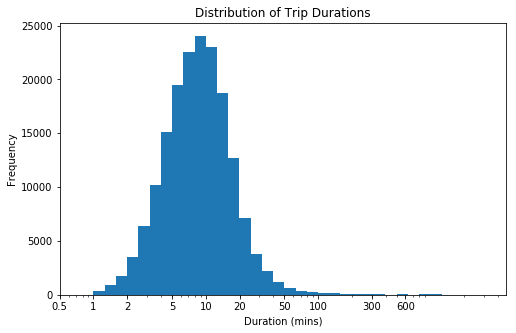

In [5]:
# Changing the trip durations from seconds to minutes 

df_bike['duration_mins'] = df_bike['duration_sec'] / 60
df_bike.drop('duration_sec' , axis = 1 , inplace = True)

bins = 10 ** np.arange(0 , 3.5+0.1 , 0.1)
ticks = [0.5, 1, 2, 5, 10, 20, 50, 100, 300, 600]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_mins', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.show()

## Distribution of days of trip

> The graph shows that lot of people do not take bike trips on the weekends because Saturday and Sunday has the least count.

> However, to make the report more presentable, the days of the week would be re-arranged properly.

In [6]:
# creating functions to perform the repetitive task of value count and doing a count plot fot the individual variables.

def v_count(a):
    output = df_bike[a].value_counts()
    return output

def c_plot(a,b,c):
    output = sb.countplot(data = df_bike, x=a, color=sb.color_palette()[0]);
    plt.xlabel(b)
    plt.title(c);
    return output

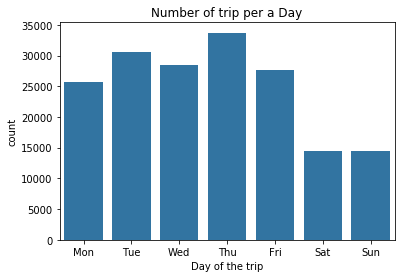

In [7]:
df_bike['trip_day'] = pd.Categorical(df_bike['trip_day'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)

c_plot('trip_day','Day of the trip','Number of trip per a Day')

## Distribution of hours of the day

> Early morning from 07 to 09 and evening from 16 to 18 has the highest trip count showing that most people take their ride around those times.

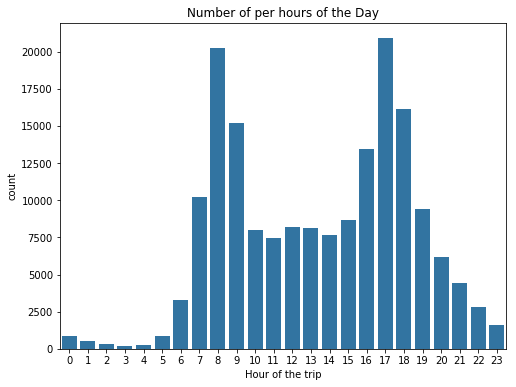

In [8]:
plt.figure(figsize=[8, 6])
c_plot('trip_hour','Hour of the trip','Number of per hours of the Day')

## Distribution of user type

> There is a clear difference between the number subcribers and the number customers. It looks like members - 'subcribers' mostly go ride than costomers who are just casual users

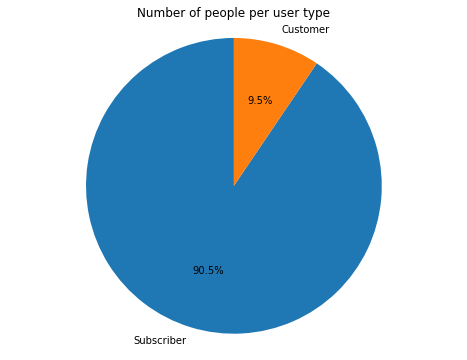

In [9]:
data = v_count('user_type')
label = ['Subscriber', 'Customer' ]

plt.figure(figsize=[8, 6])
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Number of people per user type')
plt.axis('equal')
plt.show()

## Distribution of hours of the day

> Per the dataset, there are More males gender type than females and other gender types

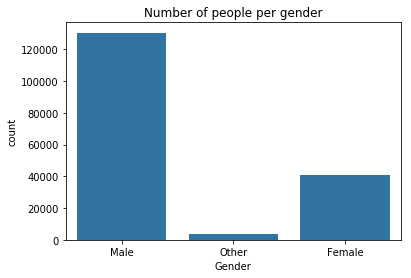

In [10]:
data = v_count('member_gender')
label = ['Male', 'Female', 'Other' ]

c_plot('member_gender','Gender','Number of people per gender')


## Distribution of duration against days of the week

> There are some trips that have longer durations, and it wont make the distribution easy to comprehend, so we are going to cut down to trips below 60 mins

> With the cut down data, weekend trips take a longer duration as compared to trips taken during the week

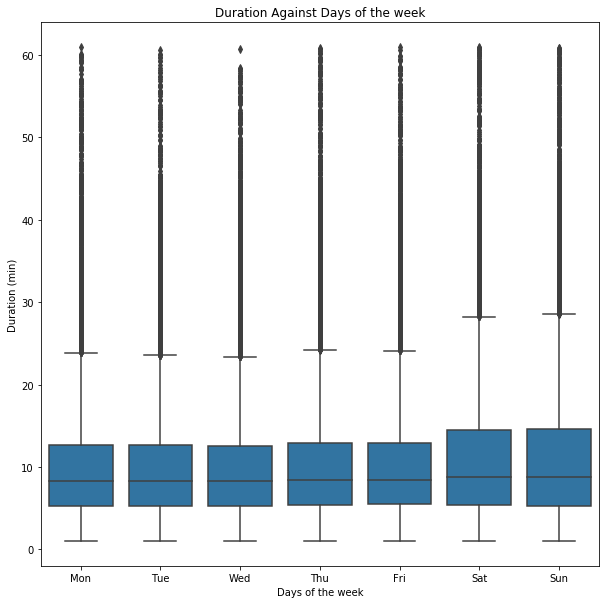

In [11]:
# querying for data with duration below 60 mins that is 1 hour

df_dur = df_bike.query("duration_mins < 61")

# plotting the relationship between days of the week and duration
plt.figure(figsize=[10, 10])

sb.boxplot(x="trip_day", y="duration_mins", color = sb.color_palette()[0], data=df_dur)
plt.xlabel('Days of the week')
plt.ylabel('Duration (min)')
plt.title('Duration Against Days of the week');

## Distribution of duration against gender

> Although in previous section it was shown that there are more male users than the other gender groups, the trip duration does not seem to be affected by the user gender. The violin plots shows a median of around 10 mins for all 3 gender categories.

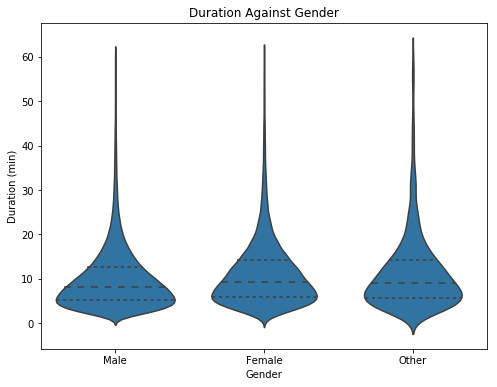

In [12]:
# plotting the relationship between gender and duration
# Still using the dataset with duration below 60 mins

plt.figure(figsize=[8, 6])
sb.violinplot( x='member_gender', y='duration_mins', color=sb.color_palette()[0], inner='quartile', data=df_dur)
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against Gender');

## Distribution of duration against user type

> Customer user type trips take a longer duration than subscriber user type, althought they are not a lot in the dataset

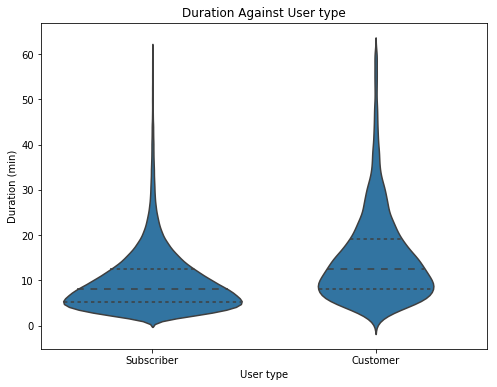

In [13]:
# plotting the relationship between gender and duration
# Still using the dataset with duration below 60 mins

plt.figure(figsize=[8, 6])
sb.violinplot( x='user_type', y='duration_mins', color=sb.color_palette()[0], inner='quartile', data=df_dur)
plt.xlabel('User type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User type');

## Distribution of user type against hour of trip and number of trips

> There is an obvious difference in the number of trips for both groups between the hours of 8 to 18, although they both are left skewed.

Text(-8.95,0.5,'Number of Trips')

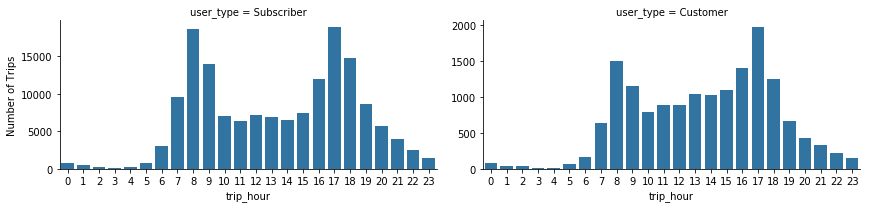

In [14]:
g = sb.FacetGrid(col='user_type', col_wrap = 2, aspect=2, sharey=False, data=df_dur)
g.map(sb.countplot, 'trip_hour')
g.axes[0].set_ylabel('Number of Trips')

## Distribution of user type against gender

> As already shown above, there are more subscribers and males in the dataset

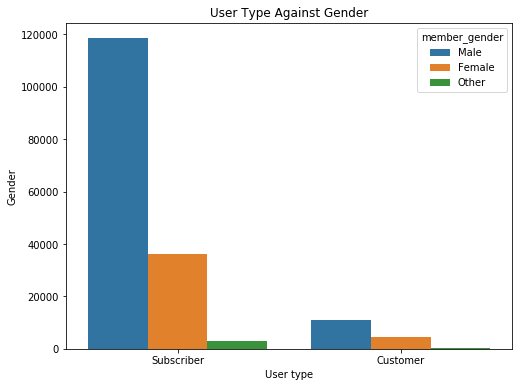

In [15]:
# plotting the count value of user type againt gender. 

plt.figure(figsize=[8, 6])
sb.countplot(data=df_dur, x='user_type', hue='member_gender')
plt.xlabel('User type')
plt.ylabel('Gender')
plt.title('User Type Against Gender');

## Distribution of trip duartion across user type in different days of the week

> As already shown above, customers take longer trips then subscribers, and their longest trips are mostly on the weekends.

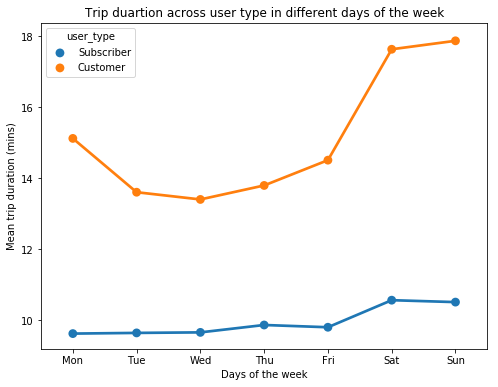

In [16]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(x = 'trip_day', y = 'duration_mins', hue = 'user_type', ci=None, data = df_dur)
plt.title('Trip duartion across user type in different days of the week')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Days of the week')
plt.show();

## Distribution of trip duartion across gender in different days of the week

> The violin plots about gender and trip duration did not show that much of a different, and this plot shows that the male gender group mostly take short trips than the female and others gender types.

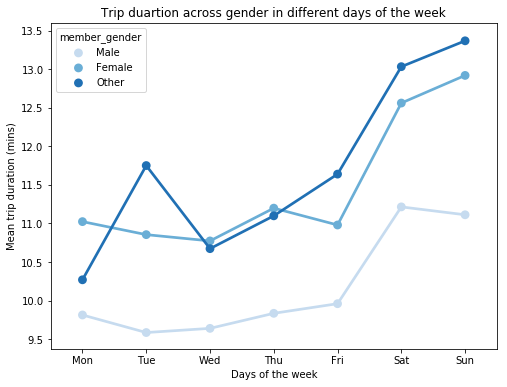

In [17]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dur, x = 'trip_day', y = 'duration_mins', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across gender in different days of the week')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Days of the week')
plt.show();

## Distribution of trip duartion across gender in different days of the week

> Per the graph, most customers have a longer trip duration and mostly utilize the bike services during the day.

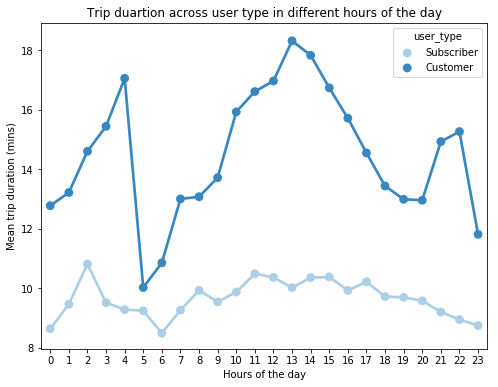

In [18]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dur, x = 'trip_hour', y = 'duration_mins', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different hours of the day')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Hours of the day')
plt.show();